In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import regularizers

In [ ]:
train_path = '/content/drive/MyDrive/Capstone Project/soil_image'

folders = os.listdir(train_path)

print("Jumlah Folder: ", (len(folders)))
print("Daftar Folder:")
for folder in folders:
    print(folder)

Jumlah Folder:  6
Daftar Folder:
peat
clay
loam
chalk
silt
sand


In [ ]:
# Augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.5, 1.5],
    channel_shift_range=20,
    validation_split=0.2
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_batches = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

validation_batches = validation_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

Found 454 images belonging to 6 classes.
Found 454 images belonging to 6 classes.


In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape = (150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
      tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
      tf.keras.layers.Dense(6, activation='softmax')
  ])
  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_batches, validation_data=validation_batches, verbose=1, epochs=50)

Epoch 1/50
15/15 [==============================] - 129s 8s/step - loss: 2.2460 - accuracy: 0.2687 - val_loss: 1.8649 - val_accuracy: 0.3767
Epoch 2/50
15/15 [==============================] - 24s 2s/step - loss: 1.7724 - accuracy: 0.4273 - val_loss: 1.5180 - val_accuracy: 0.5485
Epoch 3/50
15/15 [==============================] - 26s 2s/step - loss: 1.5389 - accuracy: 0.4956 - val_loss: 1.4733 - val_accuracy: 0.4956
Epoch 4/50
15/15 [==============================] - 24s 2s/step - loss: 1.3540 - accuracy: 0.5352 - val_loss: 1.5459 - val_accuracy: 0.4714
Epoch 5/50
15/15 [==============================] - 22s 1s/step - loss: 1.4248 - accuracy: 0.5441 - val_loss: 1.1116 - val_accuracy: 0.6542
Epoch 6/50
15/15 [==============================] - 26s 2s/step - loss: 1.2426 - accuracy: 0.5837 - val_loss: 1.0746 - val_accuracy: 0.6454
Epoch 7/50
15/15 [==============================] - 25s 2s/step - loss: 1.1738 - accuracy: 0.5925 - val_loss: 0.9672 - val_accuracy: 0.6828
Epoch 8/50
15/15 [=

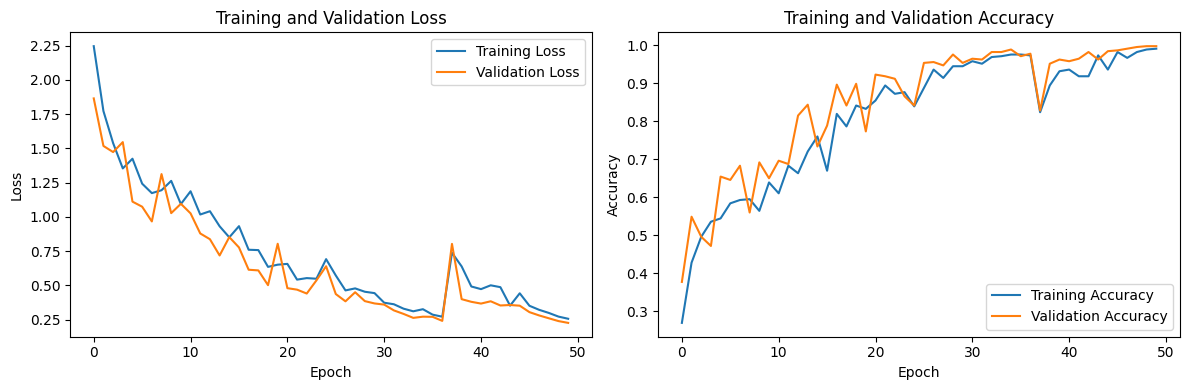

In [ ]:
# Menampilkan grafik loss dan akurasi
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
import numpy as np
from skimage import transform

def load(filename):
  np_image = Image.open(filename)
  np_image = np.array(np_image).astype('float32') / 255
  np_image = transform.resize(np_image, (150, 150, 3))
  np_image = np.expand_dims(np_image, axis=0)
  return np_image

image = load('/content/drive/MyDrive/Capstone Project/Predict/Screenshot 2023-12-13 131046.png')
predictions = model.predict(image)
predicted_class = np.argmax(predictions)


class_labels = ['Chalk', 'Clay', 'Loam', 'Peat', 'Sand', 'Silt']
print(f"Predicted Class: {predicted_class}")
print(f"Predicted Label: {class_labels[predicted_class]}")

1/1 [==============================] - 0s 32ms/step
Predicted Class: 0
Predicted Label: Chalk


In [ ]:
model.save('/content/drive/MyDrive/Capstone Project/saved_model_1')

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Capstone Project/saved_model_1')

loaded_model.save('/content/drive/MyDrive/Capstone Project/saved_model_1/model_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Capstone Project/saved_model_1/model_1.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model_1.tflite", "wb").write(tflite_model)

19174428

In [ ]:
tflite_model_path = '/content/model_1.tflite'

interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:")
print(input_details)

print("\nOutput details:")
print(output_details)

Input details:
[{'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([  1, 150, 150,   3], dtype=int32), 'shape_signature': array([ -1, 150, 150,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]

Output details:
[{'name': 'StatefulPartitionedCall:0', 'index': 24, 'shape': array([1, 6], dtype=int32), 'shape_signature': array([-1,  6], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Capstone Project/saved_model')

loaded_model.save('/content/drive/MyDrive/Capstone Project/saved_model/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Capstone Project/saved_model/model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model.tflite", "wb").write(tflite_model)

19174428